In [15]:
pip install klib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
df=pd.read_csv('/Users/abduroshyd/Downloads/artworks_piccaso4.csv')

In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   title                          246 non-null    object
 1   artist                         246 non-null    object
 2   description                    245 non-null    object
 3   purchase_price                 246 non-null    object
 4   sale_price                     246 non-null    object
 5   gross_appreciation_multiplier  246 non-null    object
 6   gross_appreciation_period      246 non-null    object
 7   url                            246 non-null    object
 8   has_image                      246 non-null    bool  
 9   image_url                      240 non-null    object
dtypes: bool(1), object(9)
memory usage: 17.7+ KB


title                            0
artist                           0
description                      1
purchase_price                   0
sale_price                       0
gross_appreciation_multiplier    0
gross_appreciation_period        0
url                              0
has_image                        0
image_url                        6
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
def encodla(df):
    encoder=LabelEncoder()
    for col in df.columns:
        if df[col].dtype=='object':
            if df[col].nunique()<=5:
                dummies=pd.get_dummies(df[col],prefix=col,dtype=int)
                df=pd.concat([df.drop(columns=col),dummies],axis=1)
            else:
                df[col]=encoder.fit_transform(df[col])
    return df


In [22]:
encodla(df)

,title,description,purchase_price,sale_price,gross_appreciation_multiplier,gross_appreciation_period,url,has_image,image_url,artist_PABLO PICASSO (b. 1881 d. 1973)
0,206,134,19,107,57,34,203,True,154,1
1,57,85,143,42,50,28,69,True,139,1
2,164,47,79,185,49,15,191,True,136,1
3,52,84,180,63,48,26,62,True,198,1
4,18,114,72,144,37,32,19,True,41,1
...,...,...,...,...,...,...,...,...,...,...
241,139,15,54,1,1,31,164,True,30,1
242,98,27,140,65,1,32,116,True,142,1
243,8,115,230,99,0,11,9,True,164,1
244,9,115,116,23,0,30,10,True,181,1


In [18]:
import klib

TypeError: zip() takes no keyword arguments

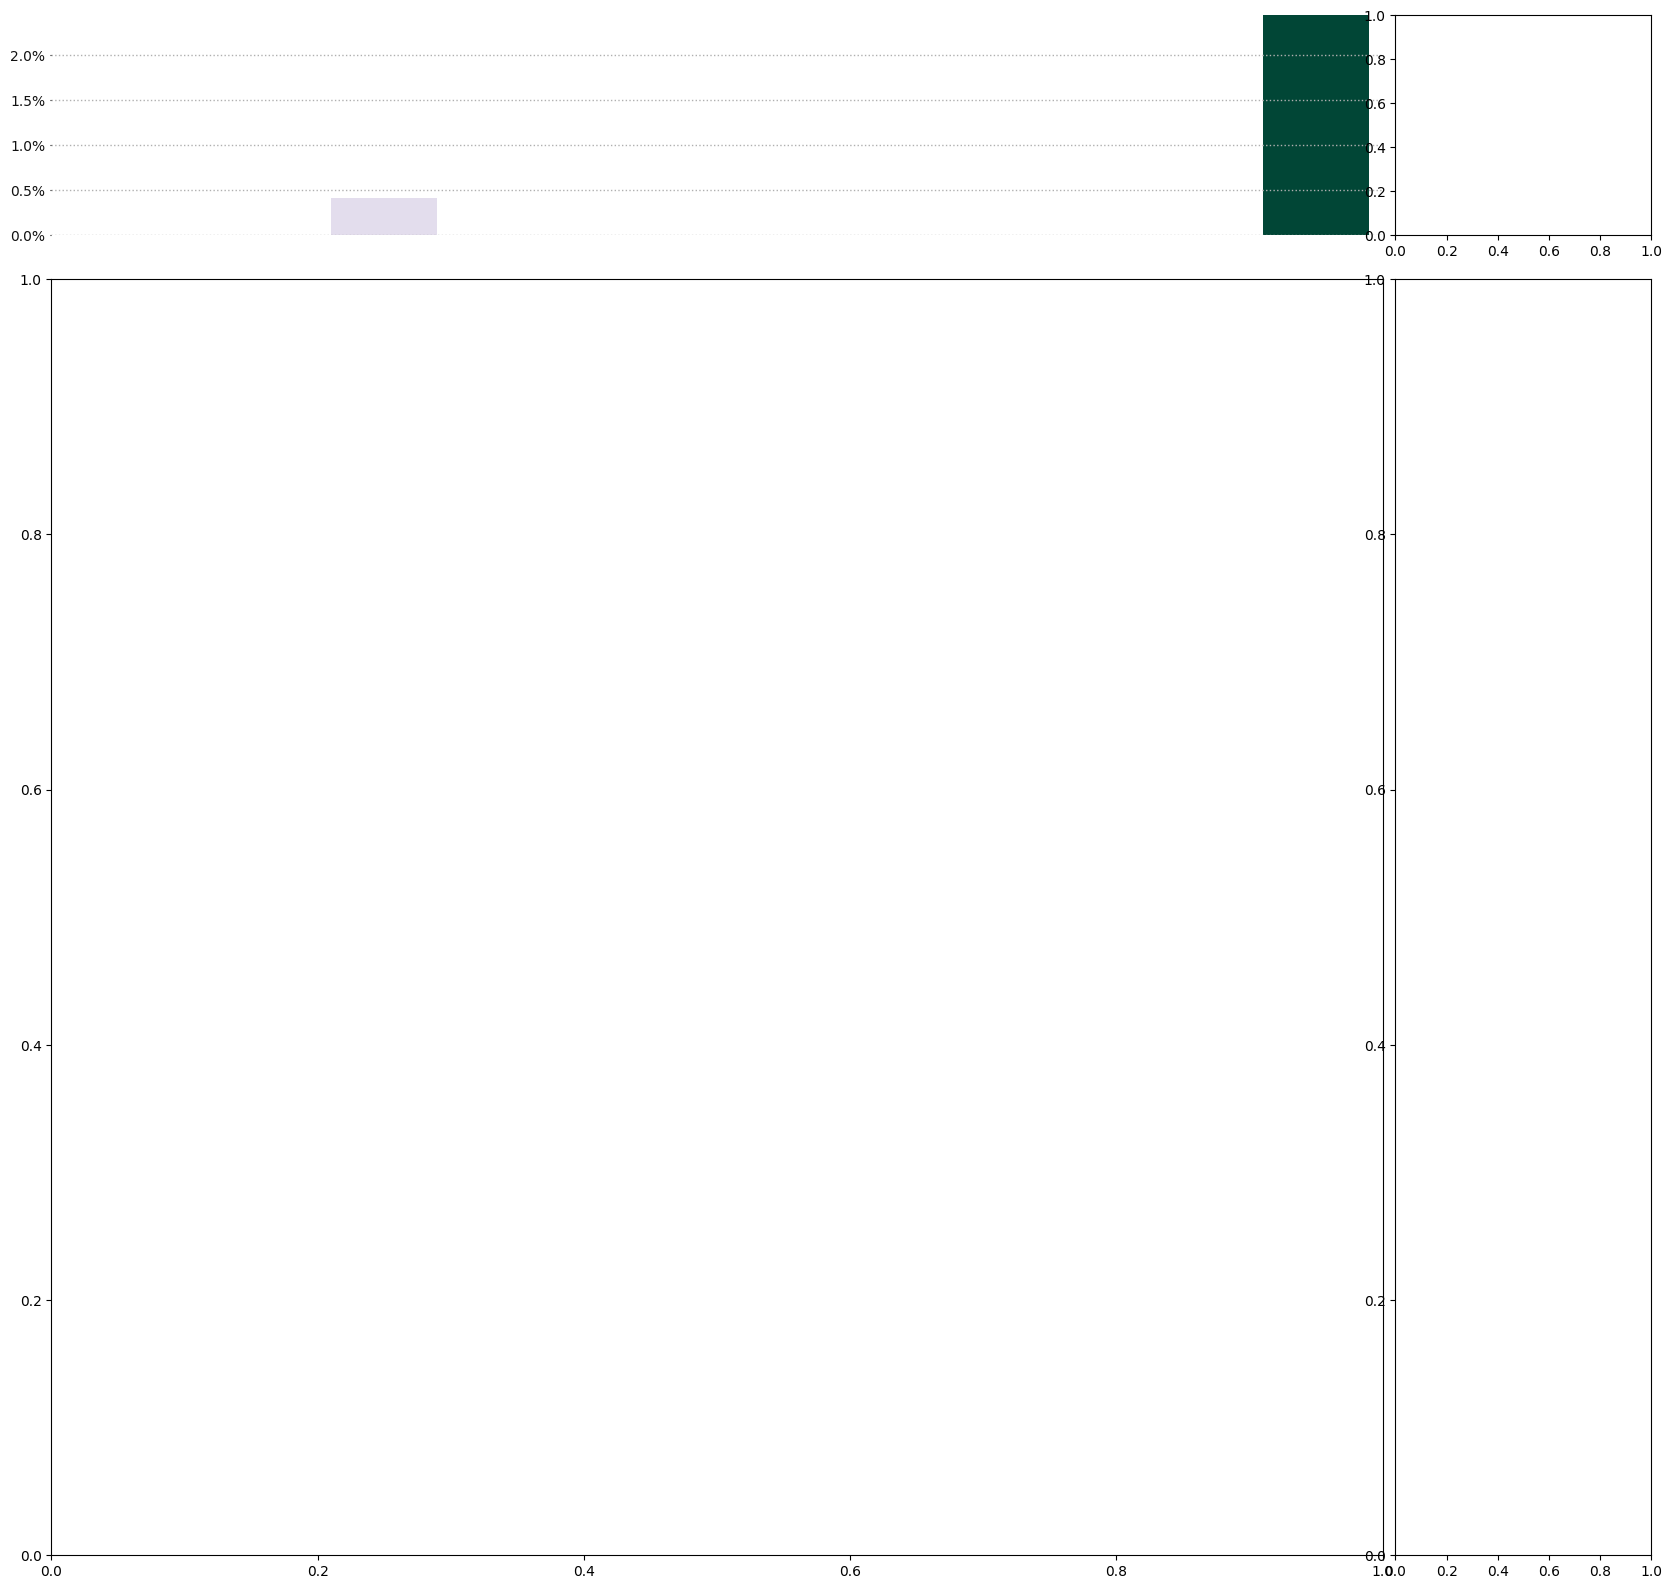

In [23]:
klib.missingval_plot(df)


In [24]:
klib.corr_interactive_plot(df, figsize=(10,6))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'rgb(84,48,5)'], [0.1, 'rgb(140,81,10)'], [0.2,
                             'rgb(191,129,45)'], [0.3, 'rgb(223,194,125)'], [0.4,
                             'rgb(246,232,195)'], [0.5, 'rgb(245,245,245)'], [0.6,
                             'rgb(199,234,229)'], [0.7, 'rgb(128,205,193)'], [0.8,
                             'rgb(53,151,143)'], [0.9, 'rgb(1,102,94)'], [1.0,
                             'rgb(0,60,48)']],
              'hoverongaps': False,
              'text': array([['', -0.09],
                             ['', '']], dtype=object),
              'textfont': {'size': 12},
              'texttemplate': '%{text}',
              'type': 'heatmap',
              'x': array(['has_image', 'title'], dtype=object),
              'xgap': 1,
              'y': array(['has_image', 'title'], dtype=object),
              'ygap': 1,
              'z': {'bdata': 'AAAAAAAA+H/DLjp+V4a2vwAAAAAAAPh/AAAAAAAA+H8=', 'dtype': 'f8', 'shape': '2, 2'},
              'zmax': np.float64(-0.14),
              'zmin': np.float64(-0.04)}],
    'layout': {'autosize': True,
               'height': 672,
               'template': '...',
               'title': {'font': {'size': 24}, 'text': 'Feature-correlation (pearson)', 'x': 0.5},
               'width': 960,
               'xaxis': {'autorange': 'reversed'}}
})

In [25]:
df=klib.data_cleaning(df, drop_duplicates=True)

Shape of cleaned data: (246, 9) - Remaining NAs: 7


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['artist']
Dropped missing values: 0
Reduced memory by at least: 0.01 MB (-50.0%)



In [26]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          246 non-null    int16  
 1   description                    245 non-null    string 
 2   purchase_price                 246 non-null    string 
 3   sale_price                     246 non-null    string 
 4   gross_appreciation_multiplier  246 non-null    string 
 5   gross_appreciation_period      246 non-null    string 
 6   url                            246 non-null    string 
 7   has_image                      246 non-null    boolean
 8   image_url                      240 non-null    string 
dtypes: boolean(1), int16(1), string(7)
memory usage: 14.5 KB


title                            0
description                      1
purchase_price                   0
sale_price                       0
gross_appreciation_multiplier    0
gross_appreciation_period        0
url                              0
has_image                        0
image_url                        6
dtype: int64

In [29]:
from  datacleaner import autoclean

/Users/abduroshyd/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning:

urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020



In [30]:
df=autoclean(df)

/Users/abduroshyd/Library/Python/3.9/lib/python/site-packages/datacleaner/datacleaner.py:77: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/abduroshyd/Library/Python/3.9/lib/python/site-packages/datacleaner/datacleaner.py:77: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [31]:
df.isnull().sum()

title                            0
description                      0
purchase_price                   0
sale_price                       0
gross_appreciation_multiplier    0
gross_appreciation_period        0
url                              0
has_image                        0
image_url                        0
dtype: int64

In [28]:
pip install datacleaner

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 64 kB 502 kB/s eta 0:00:01
     |████████████████████████████████| 207 kB 945 kB/s eta 0:00:01
     |████████████████████████████████| 161 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 1.8 MB/s eta 0:00:01
  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7424 sha256=48b922ff73a9a95364128ac996e7abb0d7625a5d0bbcd19f02799800376d5bdc
  Stored in directory: /Users/abduroshyd/Library/Caches/pip/wheels/e0/f9/d4/f8a0f781f327cf5ecff06d08eb423db48944b6171fb113c57c
Successfully built datacleaner
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
